<a href="https://colab.research.google.com/github/rockfiller/Prediction-of-quality-of-Wine/blob/main/Prediction_of_quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import torch

df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


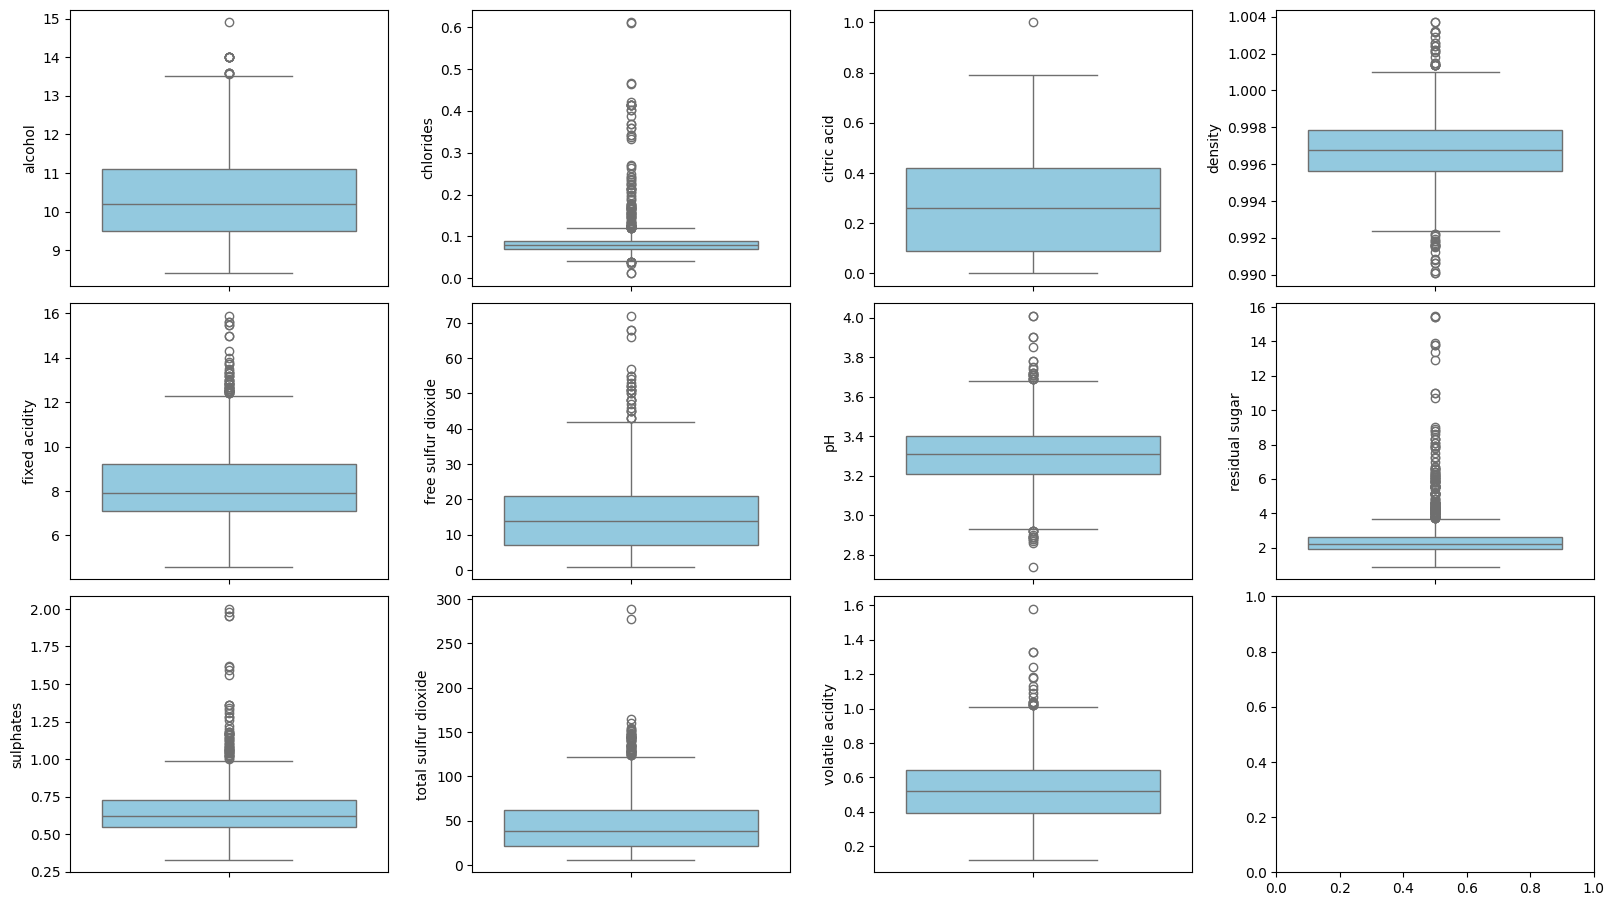

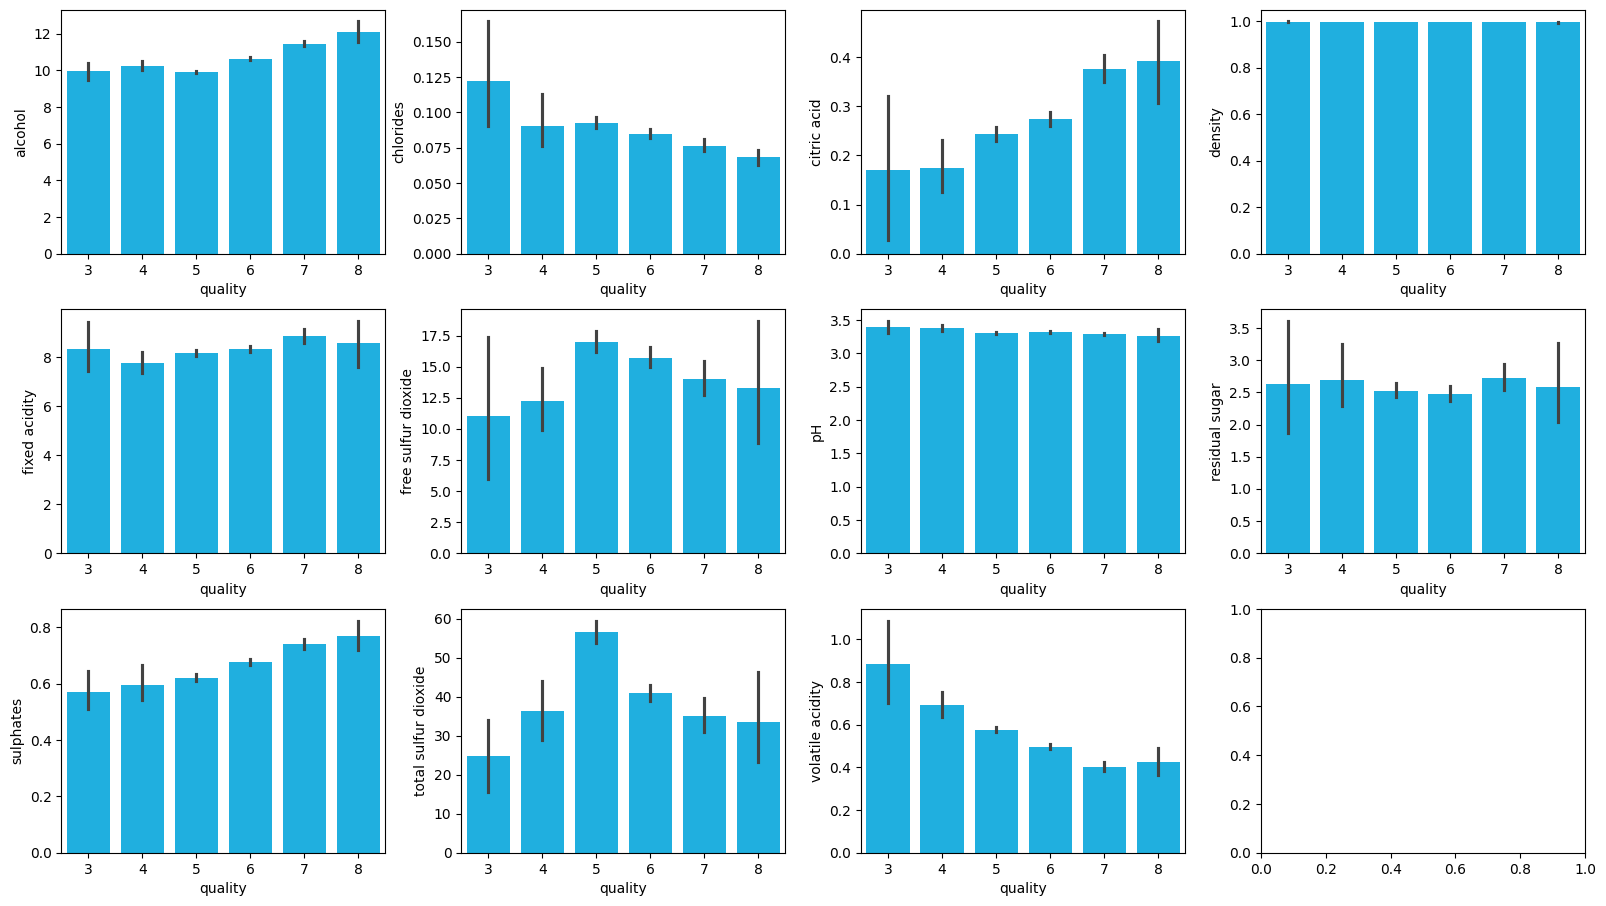

In [128]:
def plot_subplots(data, plot_type, nrows, ncols, figsize, exclude_col):
    '''
    Plot multiple charts (boxplots or barplots) for a given dataset.

    Parameters:
        data: DataFrame to plot
        plot_type: Type of chart ('boxplot' or 'barplot')
        nrows: Number of rows of subplots
        ncols: Number of columns of subplots
        figsize: Figure size (tuple)
        exclude_col: Column to exclude from plotting
    '''
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(data.columns.difference(exclude_col)):
        if plot_type == 'boxplot':
            sns.boxplot(data=data, y=data[col], ax=axes[i], color='skyblue')
        elif plot_type == 'barplot':
            sns.barplot(data=data, x='quality', y=data[col], ax=axes[i], color='deepskyblue')
        else:
            raise ValueError('Invalid plot type')
    plt.tight_layout(pad=0.5)
    plt.show()

plot_subplots(data=df, plot_type='boxplot', nrows=3, ncols=4, figsize=(16, 9), exclude_col=['quality'])
plot_subplots(data=df, plot_type='barplot', nrows=3, ncols=4, figsize=(16, 9), exclude_col=['quality'])

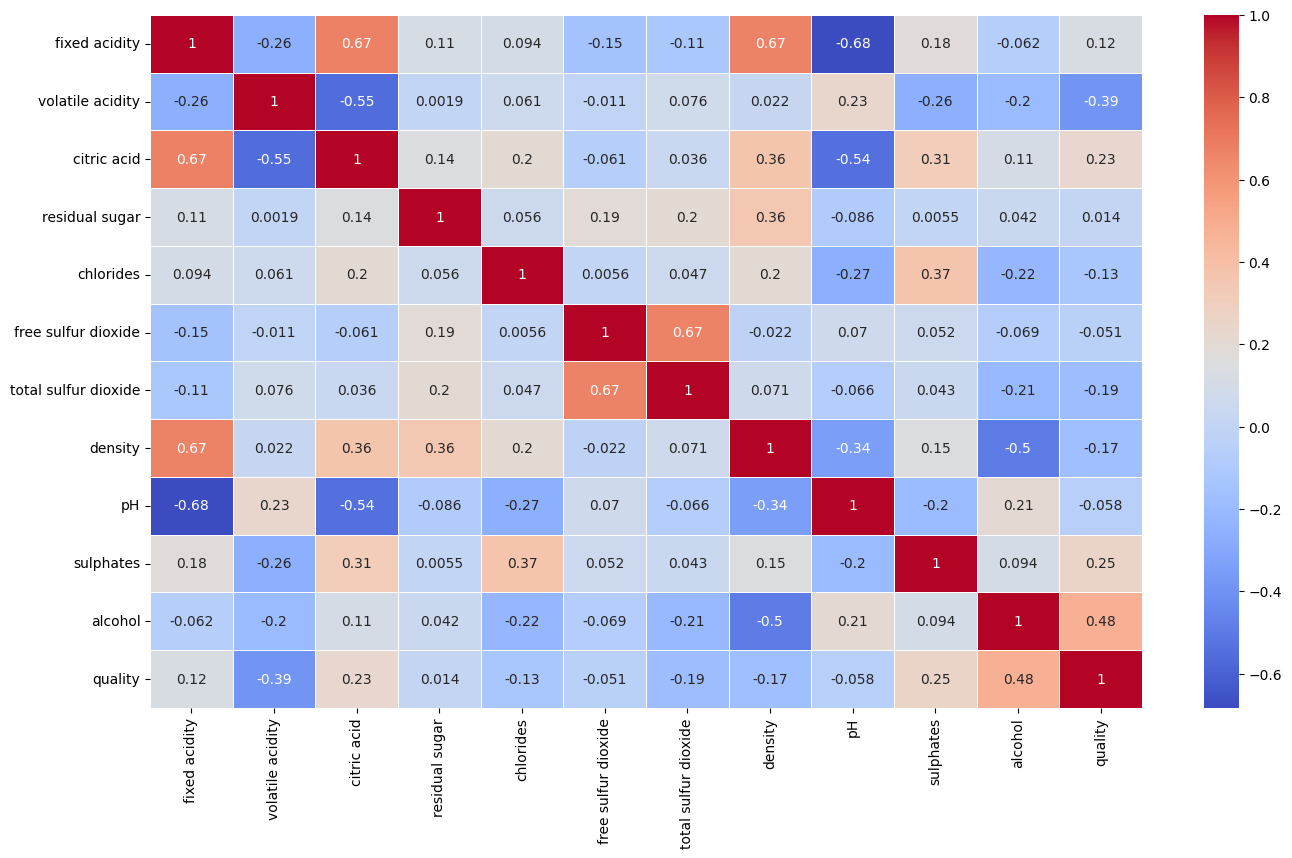

In [129]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=.5)
plt.show()

In [130]:
# https://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf
df['molecular sulfur dioxide'] = df['free sulfur dioxide'] / (1 + 10 ** (df['pH'] - 1.8))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.210381
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.957163
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.502676
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.711039
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.210381


<Axes: xlabel='quality'>

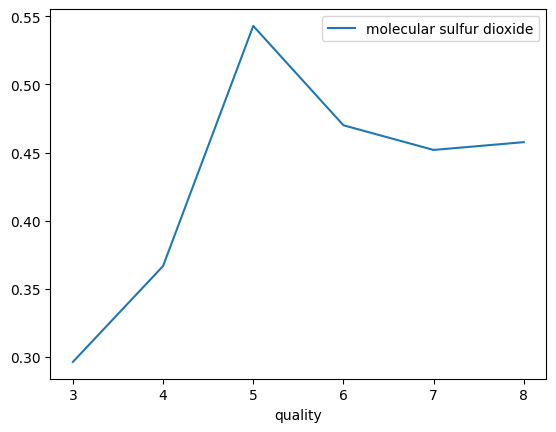

In [131]:
df.groupby('quality').aggregate({'molecular sulfur dioxide': 'mean'}).plot.line()

In [132]:
# StandardScaler
scaled_col = df.columns.difference(['quality'])
standard_scaler = StandardScaler()
df[scaled_col] = standard_scaler.fit_transform(df[scaled_col])
df.head()

# MinMaxScaler
# minmax_scaler = MinMaxScaler()
# df[scaled_col] = minmax_scaler.fit_transform(df[scaled_col])
# df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.742564
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,1.211462
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,0.022253
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,0.567456
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.742564


In [133]:
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data
bins = [0, 6.5, 10]
labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,bad,-0.742564
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,bad,1.211462
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,bad,0.022253
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,bad,0.567456
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,bad,-0.742564
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,bad,-0.642477
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,bad,-0.089931
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,good,-0.309474
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,good,-0.661828
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,bad,-0.073734


In [134]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,-0.742564
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,1.211462
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0.022253
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0,0.567456
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,-0.742564
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,0,-0.642477
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,0,-0.089931
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1,-0.309474
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1,-0.661828
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,0,-0.073734


<Axes: xlabel='quality'>

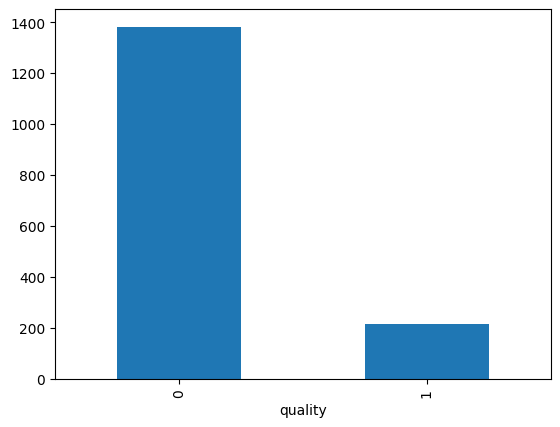

In [135]:
df['quality'].value_counts().plot.bar()

In [136]:
X = df.drop('quality', axis='columns')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'X_train: {X_train.shape}', f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}', f'y_test: {y_test.shape}')

X_train: (1279, 12) X_test: (320, 12)
y_train: (1279,) y_test: (320,)


In [137]:
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
scores = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5)
print(f'accuracy average: {scores.mean()}', f'scores: {scores}')

accuracy average: 0.899935661764706 scores: [0.90625    0.90234375 0.90625    0.8671875  0.91764706]


In [138]:
def model_train_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

for model_name, model in models.items():
    print(f'[ {model_name} ]')
    model_train_predict(model, X_train, y_train, X_test, y_test)

[ Decision Tree ]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       288
           1       0.42      0.53      0.47        32

    accuracy                           0.88       320
   macro avg       0.69      0.73      0.70       320
weighted avg       0.89      0.88      0.89       320

[ Random Forest ]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       288
           1       0.70      0.50      0.58        32

    accuracy                           0.93       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.92      0.93      0.92       320

[ KNN ]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       288
           1       0.33      0.31      0.32        32

    accuracy                           0.87       320
   macro avg       0.63      0.62      0.62       320
weighted avg       0.87      0

In [121]:
param_grids = {
    'Decision Tree': {
        'min_samples_split': [2, 5, 10],
        'max_depth': [None, 5, 10, 15]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
}

for model_name, model in models.items():
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5)
        grid_search.fit(X_train, y_train.values.ravel())
        y_pred = grid_search.best_estimator_.predict(X_test)
        best_params = grid_search.best_params_
        print(f'[ {model_name} ] best parameters: {best_params}')
        print(classification_report(y_test, y_pred))

[ Decision Tree ] best parameters: {'max_depth': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       288
           1       0.43      0.50      0.46        32

    accuracy                           0.88       320
   macro avg       0.69      0.71      0.70       320
weighted avg       0.89      0.88      0.89       320

[ Random Forest ] best parameters: {'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       288
           1       0.70      0.50      0.58        32

    accuracy                           0.93       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.92      0.93      0.92       320

[ KNN ] best parameters: {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       288
           1     

In [122]:
import torch

class Model(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, 64)
        #self.dropout1 = torch.nn.Dropout(0.1)
        self.hidden2 = torch.nn.Linear(64, 32)
        #self.dropout2 = torch.nn.Dropout(0.1)
        self.predict = torch.nn.Linear(32, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))
        #output1 = self.dropout1(output1)
        output2 = torch.relu(self.hidden2(output1))
        #output2 = self.dropout2(output2)
        output = torch.sigmoid(self.predict(output2))
        return output

model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0)
loss_func = torch.nn.BCELoss()

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)

batch_size = 32
num_epochs = 200

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        prediction = model(X_train_tensor[i:i+batch_size])
        loss = loss_func(prediction, y_train_tensor[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = loss_func(model(X_train_tensor), y_train_tensor)
    train_losses.append(float(train_loss))

    y_pred = model(X_test_tensor)
    test_loss = loss_func(y_pred, y_test_tensor)
    test_losses.append(float(test_loss))
    print(f"Epoch {epoch+1}: train_loss: {train_loss}, test_loss: {test_loss}")

Epoch 1: train_loss: 0.42752009630203247, test_loss: 0.38348761200904846
Epoch 2: train_loss: 0.36633387207984924, test_loss: 0.3127327561378479
Epoch 3: train_loss: 0.3342181146144867, test_loss: 0.2880623936653137
Epoch 4: train_loss: 0.3121613562107086, test_loss: 0.27417486906051636
Epoch 5: train_loss: 0.2994123101234436, test_loss: 0.2666323781013489
Epoch 6: train_loss: 0.29109033942222595, test_loss: 0.26271265745162964
Epoch 7: train_loss: 0.2851369082927704, test_loss: 0.26045435667037964
Epoch 8: train_loss: 0.28046584129333496, test_loss: 0.25910890102386475
Epoch 9: train_loss: 0.276592493057251, test_loss: 0.2581913471221924
Epoch 10: train_loss: 0.2732813060283661, test_loss: 0.2573520541191101
Epoch 11: train_loss: 0.270407110452652, test_loss: 0.25682732462882996
Epoch 12: train_loss: 0.26790252327919006, test_loss: 0.25662821531295776
Epoch 13: train_loss: 0.2656824588775635, test_loss: 0.2565428614616394
Epoch 14: train_loss: 0.2637084126472473, test_loss: 0.25637635

Text(0, 0.5, 'Loss')

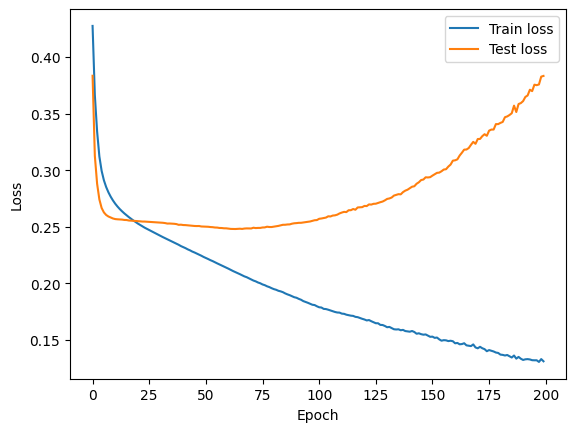

In [123]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(("Train loss", "Test loss"))
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [124]:
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       288
           1       0.38      0.56      0.46        32

    accuracy                           0.87       320
   macro avg       0.67      0.73      0.69       320
weighted avg       0.89      0.87      0.88       320

